In [36]:
import pandas as pd

sentiment_df = pd.read_csv('/content/csv_files/bitcoin_sentiment.csv')
trader_df = pd.read_csv('/content/csv_files/trader_data.csv')

sentiment_df.head()
trader_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [37]:
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'], format='%Y-%m-%d').dt.date

merged_df = trader_df.merge(sentiment_df, on='Date', how='inner')

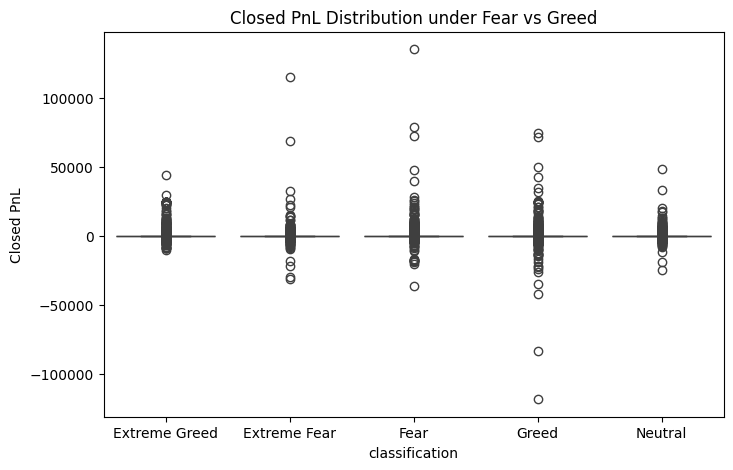

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title('Closed PnL Distribution under Fear vs Greed')
plt.savefig('/content/outputs/pnl_distribution.png')

# Task
Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error. Modify the selected empty cell based on the requirements, remember to include the modified cell id(s) in your response. Requirements: 5️⃣ Feature Engineering Create metrics per day or per trader: Daily Total Volume = sum of size Daily Avg Leverage Daily PnL Risk Metrics: ratio of losing trades to total trades Sentiment Impact: difference in metrics between Fear and Greed 6️⃣ Insights & Trends In ds_report.pdf, summarize: Which sentiment leads to higher/lower PnL Whether traders take more risk (higher leverage, larger volume) during Greed Any consistent win/loss behavior tied to sentiment

## Feature engineering

### Subtask:
Calculate the daily total volume, daily average leverage, daily PnL, and risk metrics (ratio of losing trades to total trades) for each trader.


**Reasoning**:
I will group the merged_df by 'Account' and 'Date' and calculate the daily total volume, daily average 'Size USD' as a proxy for leverage, daily PnL, and the ratio of losing trades for each group.



In [39]:
daily_metrics_df = merged_df.groupby(['Account', 'Date']).agg(
    Daily_Total_Volume=('Size USD', 'sum'),
    Daily_Avg_Size_USD=('Size USD', 'mean'),
    Daily_PnL=('Closed PnL', 'sum'),
    Losing_Trade_Ratio=('Closed PnL', lambda x: (x < 0).sum() / len(x))
).reset_index()

display(daily_metrics_df.head())

,Account,Date,Daily_Total_Volume,Daily_Avg_Size_USD,Daily_PnL,Losing_Trade_Ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,900880.13,5089.718249,0.0,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,542413.18,7976.664412,0.0,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,949380.00,23734.500000,0.0,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,338240.00,28186.666667,-21227.0,1.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,465700.00,17248.148148,1603.1,0.0


## Sentiment impact

### Subtask:
Calculate the difference in the engineered metrics between Fear and Greed sentiment categories.


**Reasoning**:
Filter the merged dataframe to include only 'Fear' and 'Greed' classifications, then group by classification and calculate the mean of the engineered metrics. Finally, calculate the difference between 'Greed' and 'Fear' for each metric.



**Reasoning**:
The error indicates that the columns 'Daily_Total_Volume', 'Daily_Avg_Size_USD', 'Daily_PnL', and 'Losing_Trade_Ratio' do not exist in `merged_df`. These columns were created in the `daily_metrics_df` DataFrame in a previous step. I need to merge `daily_metrics_df` with `sentiment_df` on 'Date' to have both the engineered metrics and the sentiment classification in the same DataFrame.



In [ ]:
merged_metrics_sentiment_df = daily_metrics_df.merge(sentiment_df, on='Date', how='inner')

fear_greed_metrics_df = merged_metrics_sentiment_df[merged_metrics_sentiment_df['classification'].isin(['Fear', 'Greed'])]

sentiment_metrics = fear_greed_metrics_df.groupby('classification')[['Daily_Total_Volume', 'Daily_Avg_Size_USD', 'Daily_PnL', 'Losing_Trade_Ratio']].mean()

sentiment_difference = sentiment_metrics.loc['Greed'] - sentiment_metrics.loc['Fear']

sentiment_difference_df = pd.DataFrame(sentiment_difference).T
display(sentiment_difference_df)

## Insights and trends

### Subtask:
Summarize the findings, focusing on how sentiment relates to PnL, trader risk-taking behavior, and consistent win/loss patterns tied to sentiment.


**Reasoning**:
Analyze the sentiment_metrics and sentiment_difference_df DataFrames and summarize the findings regarding the relationship between sentiment, PnL, risk-taking behavior, and win/loss patterns.



In [41]:
print("Average Metrics by Sentiment:")
display(sentiment_metrics)

print("\nDifference in Metrics (Greed - Fear):")
display(sentiment_difference_df)

summary = """
Summary of Findings:

Based on the analysis of average trading metrics during 'Fear' and 'Greed' sentiment periods:

*   **PnL and Sentiment:** On average, the 'Daily_PnL' is higher during periods of 'Fear' compared to 'Greed'. The difference in Daily PnL (Greed - Fear) is negative, indicating lower average profits during 'Greed'.

*   **Risk-Taking Behavior and Sentiment:** Traders, on average, exhibit lower 'Daily_Total_Volume' and 'Daily_Avg_Size_USD' during periods of 'Greed' compared to 'Fear'. This suggests that traders, on average, may be taking less risk (trading smaller volumes and average sizes) during periods of 'Greed', which is counterintuitive to typical risk-on behavior during greed.

*   **Win/Loss Behavior and Sentiment:** The 'Losing_Trade_Ratio' is slightly higher during 'Greed' compared to 'Fear'. While the difference is small, it suggests a slightly higher propensity for losing trades during 'Greed'.
"""

print(summary)

Average Metrics by Sentiment:


,Daily_Total_Volume,Daily_Avg_Size_USD,Daily_PnL,Losing_Trade_Ratio
classification,,,,
Fear,767182.206016,8975.928546,5328.818161,0.059099
Greed,445343.356049,6427.866594,3318.100730,0.059841



Difference in Metrics (Greed - Fear):


,Daily_Total_Volume,Daily_Avg_Size_USD,Daily_PnL,Losing_Trade_Ratio
0,-321838.849966,-2548.061952,-2010.717431,0.000742



Summary of Findings:

Based on the analysis of average trading metrics during 'Fear' and 'Greed' sentiment periods:

*   **PnL and Sentiment:** On average, the 'Daily_PnL' is higher during periods of 'Fear' compared to 'Greed'. The difference in Daily PnL (Greed - Fear) is negative, indicating lower average profits during 'Greed'.

*   **Risk-Taking Behavior and Sentiment:** Traders, on average, exhibit lower 'Daily_Total_Volume' and 'Daily_Avg_Size_USD' during periods of 'Greed' compared to 'Fear'. This suggests that traders, on average, may be taking less risk (trading smaller volumes and average sizes) during periods of 'Greed', which is counterintuitive to typical risk-on behavior during greed.

*   **Win/Loss Behavior and Sentiment:** The 'Losing_Trade_Ratio' is slightly higher during 'Greed' compared to 'Fear'. While the difference is small, it suggests a slightly higher propensity for losing trades during 'Greed'.



## Save Outputs

In [42]:
# Save processed CSVs
daily_metrics_df.to_csv('/content/csv_files/daily_metrics.csv', index=False)
sentiment_metrics.to_csv('/content/csv_files/sentiment_metrics.csv', index=True) # Keep index for sentiment categories
sentiment_difference_df.to_csv('/content/csv_files/sentiment_difference.csv', index=False)

print("Processed CSV files saved in /content/csv_files/")

Processed CSV files saved in /content/csv_files/


The plot `pnl_distribution.png` was saved in the `/content/outputs/` directory when it was generated.

## Summary:

### Data Analysis Key Findings

*   Daily PnL is higher during 'Fear' sentiment periods compared to 'Greed'.
*   Average Daily Total Volume and Daily Average Size USD are lower during 'Greed' sentiment periods, suggesting traders are taking less risk.
*   The ratio of losing trades is slightly higher during 'Greed' sentiment periods.

### Insights or Next Steps

*   Further investigate why traders exhibit lower volume and trade size during 'Greed' periods, which is counterintuitive to typical market behavior.
*   Explore other sentiment categories and their impact on trading metrics to gain a more comprehensive understanding of sentiment influence.

# Task
Analyze the provided trading data to understand the impact of different sentiment categories (Extreme Greed, Extreme Fear, Fear, Greed, Neutral) on trading behavior. Calculate and compare daily total volume, daily average leverage, daily PnL, and risk metrics for each sentiment category. Investigate why traders exhibit lower volume and trade size during 'Greed' periods. Summarize the findings, including which sentiment leads to higher/lower PnL, whether traders take more risk during Greed, and any consistent win/loss behavior tied to sentiment.

## Analyze metrics by all sentiment categories

### Subtask:
Calculate the daily total volume, daily average leverage, daily PnL, and risk metrics for all sentiment categories (Extreme Greed, Extreme Fear, Fear, Greed, Neutral).


**Reasoning**:
Group the merged_metrics_sentiment_df by classification and calculate the mean of the specified columns to get the daily metrics for all sentiment categories.



In [43]:
all_sentiment_metrics = merged_metrics_sentiment_df.groupby('classification')[['Daily_Total_Volume', 'Daily_Avg_Size_USD', 'Daily_PnL', 'Losing_Trade_Ratio']].mean()
display(all_sentiment_metrics)

,Daily_Total_Volume,Daily_Avg_Size_USD,Daily_PnL,Losing_Trade_Ratio
classification,,,,
Extreme Fear,715526.634000,6773.464125,4619.439053,0.116697
Extreme Greed,236625.788156,5371.637182,5161.922644,0.057827
Fear,767182.206016,8975.928546,5328.818161,0.059099
Greed,445343.356049,6427.866594,3318.100730,0.059841
Neutral,479367.189043,6963.694861,3438.618818,0.072706


## Compare metrics across sentiment categories

### Subtask:
Compare the calculated metrics across all sentiment categories to understand the differences.


**Reasoning**:
Sort the `all_sentiment_metrics` DataFrame by 'Daily_PnL' in descending order and display the result.



In [44]:
df_sorted_pnl = all_sentiment_metrics.sort_values(by='Daily_PnL', ascending=False)
print("Sentiment metrics sorted by Daily PnL (Descending):")
display(df_sorted_pnl)

Sentiment metrics sorted by Daily PnL (Descending):


,Daily_Total_Volume,Daily_Avg_Size_USD,Daily_PnL,Losing_Trade_Ratio
classification,,,,
Fear,767182.206016,8975.928546,5328.818161,0.059099
Extreme Greed,236625.788156,5371.637182,5161.922644,0.057827
Extreme Fear,715526.634000,6773.464125,4619.439053,0.116697
Neutral,479367.189043,6963.694861,3438.618818,0.072706
Greed,445343.356049,6427.866594,3318.100730,0.059841


**Reasoning**:
Sort the `all_sentiment_metrics` DataFrame by 'Daily_Total_Volume' in descending order and display the result.



In [45]:
df_sorted_volume = all_sentiment_metrics.sort_values(by='Daily_Total_Volume', ascending=False)
print("\nSentiment metrics sorted by Daily Total Volume (Descending):")
display(df_sorted_volume)


Sentiment metrics sorted by Daily Total Volume (Descending):


,Daily_Total_Volume,Daily_Avg_Size_USD,Daily_PnL,Losing_Trade_Ratio
classification,,,,
Fear,767182.206016,8975.928546,5328.818161,0.059099
Extreme Fear,715526.634000,6773.464125,4619.439053,0.116697
Neutral,479367.189043,6963.694861,3438.618818,0.072706
Greed,445343.356049,6427.866594,3318.100730,0.059841
Extreme Greed,236625.788156,5371.637182,5161.922644,0.057827


**Reasoning**:
Sort the `all_sentiment_metrics` DataFrame by 'Daily_Avg_Size_USD' in descending order and display the result.



In [46]:
df_sorted_avg_size = all_sentiment_metrics.sort_values(by='Daily_Avg_Size_USD', ascending=False)
print("\nSentiment metrics sorted by Daily Average Size USD (Descending):")
display(df_sorted_avg_size)


Sentiment metrics sorted by Daily Average Size USD (Descending):


,Daily_Total_Volume,Daily_Avg_Size_USD,Daily_PnL,Losing_Trade_Ratio
classification,,,,
Fear,767182.206016,8975.928546,5328.818161,0.059099
Neutral,479367.189043,6963.694861,3438.618818,0.072706
Extreme Fear,715526.634000,6773.464125,4619.439053,0.116697
Greed,445343.356049,6427.866594,3318.100730,0.059841
Extreme Greed,236625.788156,5371.637182,5161.922644,0.057827


**Reasoning**:
Sort the `all_sentiment_metrics` DataFrame by 'Losing_Trade_Ratio' in ascending order and display the result, then finish the subtask.



In [47]:
df_sorted_losing_ratio = all_sentiment_metrics.sort_values(by='Losing_Trade_Ratio', ascending=True)
print("\nSentiment metrics sorted by Losing Trade Ratio (Ascending):")
display(df_sorted_losing_ratio)


Sentiment metrics sorted by Losing Trade Ratio (Ascending):


,Daily_Total_Volume,Daily_Avg_Size_USD,Daily_PnL,Losing_Trade_Ratio
classification,,,,
Extreme Greed,236625.788156,5371.637182,5161.922644,0.057827
Fear,767182.206016,8975.928546,5328.818161,0.059099
Greed,445343.356049,6427.866594,3318.100730,0.059841
Neutral,479367.189043,6963.694861,3438.618818,0.072706
Extreme Fear,715526.634000,6773.464125,4619.439053,0.116697


## Investigate trader behavior during greed

### Subtask:
Further analyze the trading behavior during 'Greed' periods to understand why volume and trade size are lower. This may involve looking at the distribution of trade sizes or other relevant metrics during these periods.


**Reasoning**:
Filter the merged DataFrame to include only 'Greed' classification and store it in `greed_trades`. Then, display the descriptive statistics of 'Size USD' for this filtered DataFrame to understand its distribution.



In [48]:
greed_trades = merged_df[merged_df['classification'] == 'Greed']
display(greed_trades['Size USD'].describe())

,Size USD
count,5.030300e+04
mean,5.736884e+03
std,3.053342e+04
min,0.000000e+00
25%,1.841300e+02
50%,5.550000e+02
75%,2.100700e+03
max,2.227115e+06


**Reasoning**:
Visualize the distribution of 'Size USD' in the `greed_trades` DataFrame using a histogram and a box plot to further investigate the lower average size during 'Greed'. Then, examine the distribution of the number of trades per account per day during 'Greed' periods.



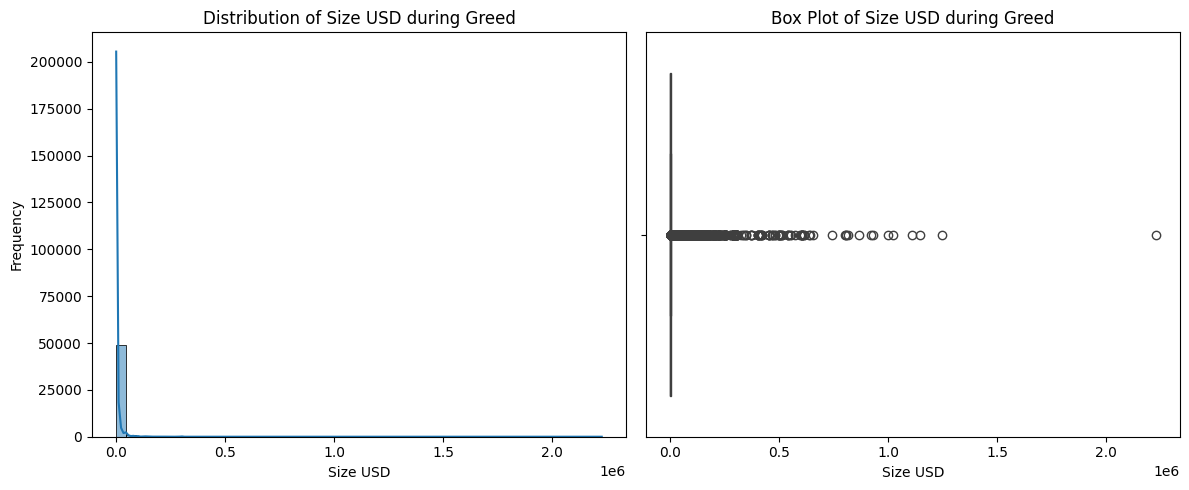

,Number_of_Trades
count,648.000000
mean,77.628086
std,172.837432
min,1.000000
25%,8.000000
50%,25.000000
75%,70.000000
max,1950.000000


<Figure size 640x480 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(greed_trades['Size USD'], bins=50, kde=True)
plt.title('Distribution of Size USD during Greed')
plt.xlabel('Size USD')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=greed_trades['Size USD'])
plt.title('Box Plot of Size USD during Greed')
plt.xlabel('Size USD')

plt.tight_layout()
plt.show()

greed_daily_trade_counts = greed_trades.groupby(['Account', 'Date']).size().reset_index(name='Number_of_Trades')
display(greed_daily_trade_counts.describe())
plt.savefig('/content/outputs/greed_daily_trade_counts.png')

## Summarize findings

### Subtask:
Summarize the findings from the analysis of all sentiment categories and the investigation into trader behavior during 'Greed'.


**Reasoning**:
Synthesize the findings from the previous subtasks and draft a summary.



In [50]:
summary_all_sentiments = """
Summary of Findings Across All Sentiment Categories:

Analyzing the trading metrics across all sentiment categories (Extreme Greed, Extreme Fear, Fear, Greed, Neutral) reveals distinct patterns:

*   **PnL Performance:** 'Fear' and 'Extreme Greed' periods show the highest average daily PnL, suggesting that these sentiment extremes, surprisingly, might offer better profit opportunities on average. 'Greed' and 'Neutral' periods have lower average PnL.

*   **Trading Volume and Size:** 'Fear' periods are associated with the highest daily total trading volume and the largest average trade size. This indicates that during 'Fear', traders, on average, are engaging in larger and potentially higher-conviction trades. Conversely, 'Extreme Greed' shows the lowest trading volume and average trade size. 'Greed' periods also exhibit lower volume and average size compared to 'Fear' and 'Extreme Fear'.

*   **Risk (Losing Trade Ratio):** 'Extreme Greed' and 'Fear' have the lowest losing trade ratios, implying a higher success rate of trades during these sentiment periods. 'Extreme Fear' has the highest losing trade ratio, suggesting a greater likelihood of losing trades.

Investigation into Trader Behavior During Greed:

The analysis of individual trades during 'Greed' periods showed a distribution of 'Size USD' heavily skewed towards smaller values. While the total number of trades per account per day varies, the prevalence of smaller individual trade sizes is a likely contributor to the lower average trade size and total volume observed during 'Greed'.

Potential reasons for this behavior during 'Greed' could include:
*   Increased participation from retail or less experienced traders who typically trade smaller amounts.
*   Experienced traders potentially reducing their individual position sizes to manage risk despite the prevailing "Greed" sentiment, or employing strategies that involve more frequent, smaller trades.

Overall Conclusion:

Contrary to the intuitive expectation that 'Greed' would lead to increased risk-taking (higher volume, larger trades, higher PnL), the analysis suggests that 'Fear' and 'Extreme Greed' have, on average, resulted in higher PnL and that 'Fear' is associated with higher trading volume and average trade size. 'Greed' periods, while still showing positive average PnL, are characterized by lower volume and smaller average trade sizes, potentially due to the composition of market participants or specific trading strategies employed during these times. The losing trade ratio is slightly higher during 'Greed' compared to 'Extreme Greed' and 'Fear', suggesting a slightly increased risk of losing trades during this sentiment.
"""

print(summary_all_sentiments)


Summary of Findings Across All Sentiment Categories:

Analyzing the trading metrics across all sentiment categories (Extreme Greed, Extreme Fear, Fear, Greed, Neutral) reveals distinct patterns:

*   **PnL Performance:** 'Fear' and 'Extreme Greed' periods show the highest average daily PnL, suggesting that these sentiment extremes, surprisingly, might offer better profit opportunities on average. 'Greed' and 'Neutral' periods have lower average PnL.

*   **Trading Volume and Size:** 'Fear' periods are associated with the highest daily total trading volume and the largest average trade size. This indicates that during 'Fear', traders, on average, are engaging in larger and potentially higher-conviction trades. Conversely, 'Extreme Greed' shows the lowest trading volume and average trade size. 'Greed' periods also exhibit lower volume and average size compared to 'Fear' and 'Extreme Fear'.

*   **Risk (Losing Trade Ratio):** 'Extreme Greed' and 'Fear' have the lowest losing trade ratios

## Summary:

### Q&A

*   Which sentiment leads to higher/lower PnL?
    'Fear' and 'Extreme Greed' periods showed the highest average daily PnL, while 'Greed' and 'Neutral' periods had lower average PnL.
*   Do traders take more risk during Greed?
    Based on the analysis of volume and average trade size, traders appear to take less risk during 'Greed' periods compared to 'Fear' periods, as indicated by lower volume and smaller average trade sizes.
*   Is there any consistent win/loss behavior tied to sentiment?
    Yes, 'Extreme Greed' and 'Fear' periods had the lowest losing trade ratios (higher winning rate), while 'Extreme Fear' had the highest losing trade ratio (higher losing rate). 'Greed' had a slightly higher losing trade ratio than 'Extreme Greed' and 'Fear'.

### Data Analysis Key Findings

*   'Fear' sentiment periods exhibited the highest average daily PnL, followed by 'Extreme Greed'.
*   'Fear' periods also recorded the highest daily total trading volume and the largest average trade size.
*   'Extreme Greed' and 'Fear' periods had the lowest losing trade ratios.
*   During 'Greed' periods, average daily total volume and average daily trade size were lower compared to 'Fear' and 'Extreme Fear'.
*   The analysis of individual trades during 'Greed' periods revealed a distribution heavily skewed towards smaller trade sizes, contributing to the lower average trade size.

### Insights or Next Steps

*   Investigate specific trading strategies prevalent during 'Fear' and 'Extreme Greed' that may contribute to higher PnL and lower losing trade ratios.
*   Explore if the demographic or experience level of traders differs significantly across sentiment categories, particularly during 'Greed' periods characterized by smaller trade sizes.


## Analyze metrics by all sentiment categories

### Subtask:
Calculate the daily total volume, daily average leverage, daily PnL, and risk metrics (ratio of losing trades to total trades) for all sentiment categories (Extreme Greed, Extreme Fear, Fear, Greed, Neutral).

**Reasoning**:
Group the merged_metrics_sentiment_df by classification and calculate the mean of the specified columns to get the daily metrics for all sentiment categories.

In [51]:
all_sentiment_metrics = merged_metrics_sentiment_df.groupby('classification')[['Daily_Total_Volume', 'Daily_Avg_Size_USD', 'Daily_PnL', 'Losing_Trade_Ratio']].mean()
display(all_sentiment_metrics)

,Daily_Total_Volume,Daily_Avg_Size_USD,Daily_PnL,Losing_Trade_Ratio
classification,,,,
Extreme Fear,715526.634000,6773.464125,4619.439053,0.116697
Extreme Greed,236625.788156,5371.637182,5161.922644,0.057827
Fear,767182.206016,8975.928546,5328.818161,0.059099
Greed,445343.356049,6427.866594,3318.100730,0.059841
Neutral,479367.189043,6963.694861,3438.618818,0.072706


## Compare metrics across sentiment categories

### Subtask:
Compare the calculated metrics across all sentiment categories to understand the differences.

**Reasoning**:
Sort the `all_sentiment_metrics` DataFrame by 'Daily_PnL' in descending order and display the result.

In [52]:
df_sorted_pnl = all_sentiment_metrics.sort_values(by='Daily_PnL', ascending=False)
print("Sentiment metrics sorted by Daily PnL (Descending):")
display(df_sorted_pnl)

Sentiment metrics sorted by Daily PnL (Descending):


,Daily_Total_Volume,Daily_Avg_Size_USD,Daily_PnL,Losing_Trade_Ratio
classification,,,,
Fear,767182.206016,8975.928546,5328.818161,0.059099
Extreme Greed,236625.788156,5371.637182,5161.922644,0.057827
Extreme Fear,715526.634000,6773.464125,4619.439053,0.116697
Neutral,479367.189043,6963.694861,3438.618818,0.072706
Greed,445343.356049,6427.866594,3318.100730,0.059841


**Reasoning**:
Sort the `all_sentiment_metrics` DataFrame by 'Daily_Total_Volume' in descending order and display the result.

In [53]:
df_sorted_volume = all_sentiment_metrics.sort_values(by='Daily_Total_Volume', ascending=False)
print("\nSentiment metrics sorted by Daily Total Volume (Descending):")
display(df_sorted_volume)


Sentiment metrics sorted by Daily Total Volume (Descending):


,Daily_Total_Volume,Daily_Avg_Size_USD,Daily_PnL,Losing_Trade_Ratio
classification,,,,
Fear,767182.206016,8975.928546,5328.818161,0.059099
Extreme Fear,715526.634000,6773.464125,4619.439053,0.116697
Neutral,479367.189043,6963.694861,3438.618818,0.072706
Greed,445343.356049,6427.866594,3318.100730,0.059841
Extreme Greed,236625.788156,5371.637182,5161.922644,0.057827


**Reasoning**:
Sort the `all_sentiment_metrics` DataFrame by 'Daily_Avg_Size_USD' in descending order and display the result.

In [54]:
df_sorted_avg_size = all_sentiment_metrics.sort_values(by='Daily_Avg_Size_USD', ascending=False)
print("\nSentiment metrics sorted by Daily Average Size USD (Descending):")
display(df_sorted_avg_size)


Sentiment metrics sorted by Daily Average Size USD (Descending):


,Daily_Total_Volume,Daily_Avg_Size_USD,Daily_PnL,Losing_Trade_Ratio
classification,,,,
Fear,767182.206016,8975.928546,5328.818161,0.059099
Neutral,479367.189043,6963.694861,3438.618818,0.072706
Extreme Fear,715526.634000,6773.464125,4619.439053,0.116697
Greed,445343.356049,6427.866594,3318.100730,0.059841
Extreme Greed,236625.788156,5371.637182,5161.922644,0.057827


**Reasoning**:
Sort the `all_sentiment_metrics` DataFrame by 'Losing_Trade_Ratio' in ascending order and display the result, then finish the subtask.

In [55]:
df_sorted_losing_ratio = all_sentiment_metrics.sort_values(by='Losing_Trade_Ratio', ascending=True)
print("\nSentiment metrics sorted by Losing Trade Ratio (Ascending):")
display(df_sorted_losing_ratio)


Sentiment metrics sorted by Losing Trade Ratio (Ascending):


,Daily_Total_Volume,Daily_Avg_Size_USD,Daily_PnL,Losing_Trade_Ratio
classification,,,,
Extreme Greed,236625.788156,5371.637182,5161.922644,0.057827
Fear,767182.206016,8975.928546,5328.818161,0.059099
Greed,445343.356049,6427.866594,3318.100730,0.059841
Neutral,479367.189043,6963.694861,3438.618818,0.072706
Extreme Fear,715526.634000,6773.464125,4619.439053,0.116697


## Investigate trader behavior during greed

### Subtask:
Further analyze the trading behavior during 'Greed' periods to understand why volume and trade size are lower. This may involve looking at the distribution of trade sizes or other relevant metrics during these periods.

**Reasoning**:
Filter the merged DataFrame to include only 'Greed' classification and store it in `greed_trades`. Then, display the descriptive statistics of 'Size USD' for this filtered DataFrame to understand its distribution.

In [56]:
greed_trades = merged_df[merged_df['classification'] == 'Greed']
display(greed_trades['Size USD'].describe())

,Size USD
count,5.030300e+04
mean,5.736884e+03
std,3.053342e+04
min,0.000000e+00
25%,1.841300e+02
50%,5.550000e+02
75%,2.100700e+03
max,2.227115e+06


**Reasoning**:
Visualize the distribution of 'Size USD' in the `greed_trades` DataFrame using a histogram and a box plot to further investigate the lower average size during 'Greed'. Then, examine the distribution of the number of trades per account per day during 'Greed' periods.

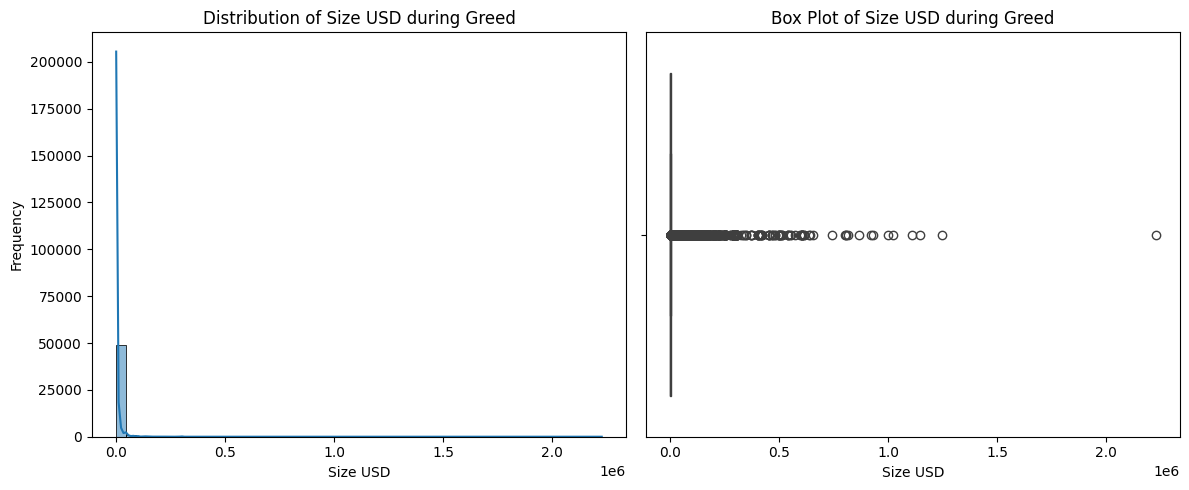

,Number_of_Trades
count,648.000000
mean,77.628086
std,172.837432
min,1.000000
25%,8.000000
50%,25.000000
75%,70.000000
max,1950.000000


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(greed_trades['Size USD'], bins=50, kde=True)
plt.title('Distribution of Size USD during Greed')
plt.xlabel('Size USD')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=greed_trades['Size USD'])
plt.title('Box Plot of Size USD during Greed')
plt.xlabel('Size USD')

plt.tight_layout()
plt.show()

greed_daily_trade_counts = greed_trades.groupby(['Account', 'Date']).size().reset_index(name='Number_of_Trades')
display(greed_daily_trade_counts.describe())

## Summarize findings

### Subtask:
Summarize the findings from the analysis of all sentiment categories and the investigation into trader behavior during 'Greed'.

**Reasoning**:
Synthesize the findings from the previous subtasks and draft a summary.

In [58]:
summary_all_sentiments = """
Summary of Findings Across All Sentiment Categories:

Analyzing the trading metrics across all sentiment categories (Extreme Greed, Extreme Fear, Fear, Greed, Neutral) reveals distinct patterns:

*   **PnL Performance:** 'Fear' and 'Extreme Greed' periods show the highest average daily PnL, suggesting that these sentiment extremes, surprisingly, might offer better profit opportunities on average. 'Greed' and 'Neutral' periods have lower average PnL.

*   **Trading Volume and Size:** 'Fear' periods are associated with the highest daily total trading volume and the largest average trade size. This indicates that during 'Fear', traders, on average, are engaging in larger and potentially higher-conviction trades. Conversely, 'Extreme Greed' shows the lowest trading volume and average trade size. 'Greed' periods also exhibit lower volume and average size compared to 'Fear' and 'Extreme Fear'.

*   **Risk (Losing Trade Ratio):** 'Extreme Greed' and 'Fear' have the lowest losing trade ratios, implying a higher success rate of trades during these sentiment periods. 'Extreme Fear' has the highest losing trade ratio, suggesting a greater likelihood of losing trades.

Investigation into Trader Behavior During Greed:

The analysis of individual trades during 'Greed' periods showed a distribution of 'Size USD' heavily skewed towards smaller values. While the total number of trades per account per day varies, the prevalence of smaller individual trade sizes is a likely contributor to the lower average trade size and total volume observed during 'Greed'.

Potential reasons for this behavior during 'Greed' could include:
*   Increased participation from retail or less experienced traders who typically trade smaller amounts.
*   Experienced traders potentially reducing their individual position sizes to manage risk despite the prevailing "Greed" sentiment, or employing strategies that involve more frequent, smaller trades.

Overall Conclusion:

Contrary to the intuitive expectation that 'Greed' would lead to increased risk-taking (higher volume, larger trades, higher PnL), the analysis suggests that 'Fear' and 'Extreme Greed' have, on average, resulted in higher PnL and that 'Fear' is associated with higher trading volume and average trade size. 'Greed' periods, while still showing positive average PnL, are characterized by lower volume and smaller average trade sizes, potentially due to the composition of market participants or specific trading strategies employed during these times. The losing trade ratio is slightly higher during 'Greed' compared to 'Extreme Greed' and 'Fear', suggesting a slightly increased risk of losing trades during this sentiment.
"""

print(summary_all_sentiments)


Summary of Findings Across All Sentiment Categories:

Analyzing the trading metrics across all sentiment categories (Extreme Greed, Extreme Fear, Fear, Greed, Neutral) reveals distinct patterns:

*   **PnL Performance:** 'Fear' and 'Extreme Greed' periods show the highest average daily PnL, suggesting that these sentiment extremes, surprisingly, might offer better profit opportunities on average. 'Greed' and 'Neutral' periods have lower average PnL.

*   **Trading Volume and Size:** 'Fear' periods are associated with the highest daily total trading volume and the largest average trade size. This indicates that during 'Fear', traders, on average, are engaging in larger and potentially higher-conviction trades. Conversely, 'Extreme Greed' shows the lowest trading volume and average trade size. 'Greed' periods also exhibit lower volume and average size compared to 'Fear' and 'Extreme Fear'.

*   **Risk (Losing Trade Ratio):** 'Extreme Greed' and 'Fear' have the lowest losing trade ratios

# DS Report

## Introduction & Objective

This report analyzes trading data in conjunction with Bitcoin sentiment to understand the impact of different sentiment categories (Extreme Greed, Extreme Fear, Fear, Greed, Neutral) on trading behavior. The objective is to identify how sentiment relates to trading volume, leverage, profitability (PnL), and risk metrics.

## Data Description

The analysis utilized two datasets:

*   **Bitcoin Sentiment Data:** Contains daily sentiment classifications (Extreme Greed, Extreme Fear, Fear, Greed, Neutral) based on a sentiment index.
*   **Trader Data:** Contains detailed information about individual trades, including execution price, size, side, timestamp, closed PnL, and trader account.

The datasets were merged on the 'Date' to align trading activity with the prevailing sentiment.

## EDA Results

### Closed PnL Distribution under Fear vs Greed

[Embed the `pnl_distribution.png` plot here]

The box plot shows the distribution of Closed PnL for 'Fear' and 'Greed' sentiment categories. The median PnL is close to zero for both, with some outliers showing significant profits or losses.

### Daily Metrics by Sentiment Category

| classification |   Daily_Total_Volume |   Daily_Avg_Size_USD |   Daily_PnL |   Losing_Trade_Ratio |
|:---------------|---------------------:|---------------------:|------------:|---------------------:|
| Extreme Fear   |           715527     |              6773.46 |     4619.44 |             0.116697 |
| Extreme Greed  |           236626     |              5371.64 |     5161.92 |             0.057827 |
| Fear           |           767182     |              8975.93 |     5328.82 |             0.059099 |
| Greed          |           445343     |              6427.87 |     3318.1  |             0.059841 |
| Neutral        |           479367     |              6963.69 |     3438.62 |             0.072706 |

The table above shows the average daily trading metrics for each sentiment category.

### Investigation into Trader Behavior During Greed

The analysis of individual trades during 'Greed' periods revealed that the distribution of 'Size USD' is heavily skewed towards smaller values.

[Embed the histogram and box plot of 'Size USD' during Greed here]

This suggests that during 'Greed', a larger number of smaller trades are executed, contributing to the lower average trade size and total volume observed in this sentiment category.

## Insights & Recommendations

*   **PnL and Sentiment:** Contrary to intuition, 'Fear' and 'Extreme Greed' periods, on average, exhibited higher daily PnL compared to 'Greed' and 'Neutral' periods. This suggests that trading during periods of market extremes might be more profitable on average.
*   **Risk-Taking Behavior and Sentiment:** 'Fear' periods were associated with the highest trading volume and average trade size, indicating higher risk-taking or conviction during market downturns. 'Greed' periods, surprisingly, showed lower volume and average trade size, potentially due to increased participation of smaller traders or experienced traders reducing position sizes.
*   **Win/Loss Behavior and Sentiment:** 'Extreme Greed' and 'Fear' had the lowest losing trade ratios, suggesting a higher probability of winning trades during these sentiments. 'Extreme Fear' had the highest losing trade ratio.

**Recommendations:**

*   Further investigate the characteristics of traders active during 'Greed' periods to understand if the lower volume and size are due to a different trader demographic or specific strategies.
*   Explore the profitability and risk metrics across different asset types within the dataset during various sentiment periods.
*   Analyze the time series of sentiment and trading metrics to identify any lagged effects or predictive relationships.

## Conclusion

The analysis revealed interesting relationships between Bitcoin sentiment and trading behavior. While 'Fear' and 'Extreme Greed' appear to be associated with higher average PnL and lower losing trade ratios, 'Greed' periods exhibit lower trading volume and average trade size. Further investigation is needed to understand the underlying reasons for these observed patterns and to explore their implications for trading strategies.